In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalaciones e importaciones
!pip install pyarrow

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inspección, Visualización y Prepocesamiento de Datos

## Carga de los datos

**detections_SNe_v7.0.1.csv**

In [3]:
df_detections = pd.read_csv('/content/drive/MyDrive/8vo Semestre/Inteligencia Computacional/Proyecto 06: Clasificación de Supernovas de ALeRCE - ZTF/datos/detections_SNe_v7.0.1.csv',
                            index_col=0)

df_detections.head()

,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,ra,...,sgscore3,neargaia,sgscore1,mjd,corrected,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,dubious,has_stamp
0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,198.722678,...,0.5,78.019280,0.175976,58991.302095,False,NaN,NaN,NaN,False,True
1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,198.722679,...,0.5,78.022800,0.175976,59000.260914,False,NaN,NaN,NaN,False,True
2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,198.722653,...,0.5,78.111310,0.175976,59004.192674,False,NaN,NaN,NaN,False,True
3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,198.722660,...,0.5,78.077545,0.175976,59021.227604,False,NaN,NaN,NaN,False,True
4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,198.722660,...,0.5,78.083150,0.175976,58986.223646,False,NaN,NaN,NaN,False,True


**dfcrossmatches_prioritized_v7.0.1.csv**

In [4]:
df_crossmatches = pd.read_csv('/content/drive/MyDrive/8vo Semestre/Inteligencia Computacional/Proyecto 06: Clasificación de Supernovas de ALeRCE - ZTF/datos/dfcrossmatches_prioritized_v7.0.1.csv')

df_crossmatches.head()

,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
0,ZTF19abegncu,AGN,357.296363,-8.941186,NaN,Oh2015,5.8772718059579e+17,AGN_galaxy_dominated,0.243081
1,ZTF18acejdhu,AGN,11.958444,-10.496615,NaN,Oh2015,5.877272256953059e+17,AGN_galaxy_dominated,0.301126
2,ZTF18acdzene,AGN,17.478620,-10.110250,NaN,Oh2015,5.877271789938934e+17,AGN_galaxy_dominated,0.158643
3,ZTF18abwzuzw,AGN,25.038255,-10.352430,NaN,Oh2015,5.877272294485526e+17,AGN_galaxy_dominated,0.485322
4,ZTF19abmposz,AGN,26.670031,-8.354787,NaN,Oh2015,5.877271806085038e+17,AGN_galaxy_dominated,0.213990


**features_cleaned.parquet**

In [5]:
df_features = pd.read_parquet('/content/drive/MyDrive/8vo Semestre/Inteligencia Computacional/Proyecto 06: Clasificación de Supernovas de ALeRCE - ZTF/datos/features_cleaned.parquet')

df_features.head()

,oid,gal_b,gal_l,g-r_max_g_r,g-r_mean_g_r,g-r_max_corr_g_r,g-r_mean_corr_g_r,rb,MHPS_ratio_g,MHPS_low_g,...,GP_DRW_tau_g,GP_DRW_sigma_r,GP_DRW_tau_r,sgscore1,W1-W2,W2-W3,g-W2,g-W3,r-W2,r-W3
0,ZTF18aahvndq,84.778146,32.955580,-0.041541,0.246432,NaN,NaN,0.882857,254.265274,26.968182,...,66.362931,0.759076,27.720122,0.175976,NaN,NaN,NaN,NaN,NaN,NaN
1,ZTF19abqviuy,-56.280179,109.009059,-0.079274,0.021343,NaN,NaN,0.930000,75.107750,5.551193,...,53.981530,0.542258,92.358918,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
2,ZTF19acyogrm,-24.613587,148.867482,1.280889,0.400809,1.227327,0.502450,0.850000,0.314363,0.056313,...,0.069667,0.385131,49.756570,0.332214,NaN,NaN,NaN,NaN,NaN,NaN
3,ZTF20aaiovoy,42.559095,209.082699,0.178904,0.587743,NaN,NaN,0.887143,13.142984,1.021393,...,18.657369,0.026580,25.050218,0.292830,NaN,NaN,NaN,NaN,NaN,NaN
4,ZTF20abcqpdj,72.178184,147.837430,0.308870,0.400827,0.498012,0.541368,0.942857,1.128955,0.027010,...,6.547652,0.009291,23.891174,0.000000,0.267,4.391,3.883968,8.274968,3.3426,7.7336


In [6]:
print(df_features.columns.tolist())


['oid', 'gal_b', 'gal_l', 'g-r_max_g_r', 'g-r_mean_g_r', 'g-r_max_corr_g_r', 'g-r_mean_corr_g_r', 'rb', 'MHPS_ratio_g', 'MHPS_low_g', 'MHPS_high_g', 'MHPS_non_zero_g', 'MHPS_PN_flag_g', 'MHPS_ratio_r', 'MHPS_low_r', 'MHPS_high_r', 'MHPS_non_zero_r', 'MHPS_PN_flag_r', 'iqr_g', 'iqr_r', 'Amplitude_g', 'AndersonDarling_g', 'Autocor_length_g', 'Beyond1Std_g', 'Con_g', 'Eta_e_g', 'Gskew_g', 'MaxSlope_g', 'Mean_g', 'Meanvariance_g', 'MedianAbsDev_g', 'MedianBRP_g', 'PairSlopeTrend_g', 'PercentAmplitude_g', 'Q31_g', 'Rcs_g', 'Skew_g', 'SmallKurtosis_g', 'Std_g', 'StetsonK_g', 'Pvar_g', 'ExcessVar_g', 'SF_ML_amplitude_g', 'SF_ML_gamma_g', 'IAR_phi_g', 'LinearTrend_g', 'Amplitude_r', 'AndersonDarling_r', 'Autocor_length_r', 'Beyond1Std_r', 'Con_r', 'Eta_e_r', 'Gskew_r', 'MaxSlope_r', 'Mean_r', 'Meanvariance_r', 'MedianAbsDev_r', 'MedianBRP_r', 'PairSlopeTrend_r', 'PercentAmplitude_r', 'Q31_r', 'Rcs_r', 'Skew_r', 'SmallKurtosis_r', 'Std_r', 'StetsonK_r', 'Pvar_r', 'ExcessVar_r', 'SF_ML_amplitude

In [7]:
# Lista de las características seleccionadas con los nombres corregidos
columnas_interes = ['oid',
    'SPM_t0_g', 'SPM_beta_r', 'SPM_tau_rise_r', 'SPM_tau_rise_g',
    'g-r_max_g_r', 'SPM_t0_r', 'LinearTrend_r', 'AndersonDarling_r',
    'SPM_beta_g', 'SPM_tau_fall_r', 'dmag_first_det_fid_g', 'MHPS_low_g',
    'LinearTrend_g', 'g-r_mean_g_r', 'MHPS_ratio_g', 'SPM_tau_fall_g',
    'SPM_gamma_r', 'MHPS_ratio_r', 'Skew_r', 'sgscore1',
    'SPM_gamma_g', 'Power_rate_2_g_r', 'IAR_phi_r', 'dmag_first_det_fid_r',
    'IAR_phi_g', 'last_diffmaglim_before_fid_g', 'Period_band_g',
    'Harmonics_mag_6_g', 'MHPS_low_r', 'Gskew_r'
]


In [8]:
# Mostrar columnas que están en el DataFrame y en la lista de interés
columnas_existentes = [col for col in columnas_interes if col in df_features.columns]
print("Columnas encontradas en el DataFrame:", columnas_existentes)

# Mostrar columnas que no fueron encontradas
columnas_no_encontradas = [col for col in columnas_interes if col not in df_features.columns]
print("Columnas NO encontradas en el DataFrame:", columnas_no_encontradas)


Columnas encontradas en el DataFrame: ['oid', 'SPM_t0_g', 'SPM_beta_r', 'SPM_tau_rise_r', 'SPM_tau_rise_g', 'g-r_max_g_r', 'SPM_t0_r', 'LinearTrend_r', 'AndersonDarling_r', 'SPM_beta_g', 'SPM_tau_fall_r', 'dmag_first_det_fid_g', 'MHPS_low_g', 'LinearTrend_g', 'g-r_mean_g_r', 'MHPS_ratio_g', 'SPM_tau_fall_g', 'SPM_gamma_r', 'MHPS_ratio_r', 'Skew_r', 'sgscore1', 'SPM_gamma_g', 'Power_rate_2_g_r', 'IAR_phi_r', 'dmag_first_det_fid_r', 'IAR_phi_g', 'last_diffmaglim_before_fid_g', 'Period_band_g', 'Harmonics_mag_6_g', 'MHPS_low_r', 'Gskew_r']
Columnas NO encontradas en el DataFrame: []


In [9]:
# Filtrar el DataFrame solo con las columnas existentes
df_features_filtrado = df_features[columnas_existentes]

# Mostrar las primeras filas del DataFrame filtrado
df_features_filtrado.head()


,oid,SPM_t0_g,SPM_beta_r,SPM_tau_rise_r,SPM_tau_rise_g,g-r_max_g_r,SPM_t0_r,LinearTrend_r,AndersonDarling_r,SPM_beta_g,...,SPM_gamma_g,Power_rate_2_g_r,IAR_phi_r,dmag_first_det_fid_r,IAR_phi_g,last_diffmaglim_before_fid_g,Period_band_g,Harmonics_mag_6_g,MHPS_low_r,Gskew_r
0,ZTF18aahvndq,-8.683957,0.703263,33.254747,27.809324,-0.041541,-4.190406,0.021631,0.816488,0.835959,...,45.757047,0.385476,0.956890,-0.309911,0.985805,18.6559,77.868850,0.069265,13.459662,-0.545919
1,ZTF19abqviuy,1.705343,0.146469,4.856173,5.044681,-0.079274,4.833134,0.023122,0.845792,0.106079,...,4.945958,0.497363,0.980776,0.469740,0.981255,19.8272,49.999996,99219.788240,3.488425,0.801963
2,ZTF19acyogrm,2.975497,0.750128,2.705224,2.797204,1.280889,4.144363,0.023859,0.983658,0.746220,...,19.578081,0.271995,0.976345,0.831920,NaN,19.8053,NaN,0.956336,7.517379,-0.572073
3,ZTF20aaiovoy,2.962453,0.199167,4.128178,2.156753,0.178904,-0.540365,0.002114,0.999672,0.418116,...,23.645691,1.000000,0.973292,0.856727,0.886609,20.6224,0.087886,20387.289220,0.206590,0.361980
4,ZTF20abcqpdj,5.718406,0.664767,4.427055,2.833862,0.308870,1.320411,0.006388,0.794905,0.787709,...,31.775678,0.633468,0.960484,3.390217,0.848879,20.8314,0.239234,2.445016,0.156744,-0.062809


In [10]:
df_features = df_features_filtrado
df_features.head()

,oid,SPM_t0_g,SPM_beta_r,SPM_tau_rise_r,SPM_tau_rise_g,g-r_max_g_r,SPM_t0_r,LinearTrend_r,AndersonDarling_r,SPM_beta_g,...,SPM_gamma_g,Power_rate_2_g_r,IAR_phi_r,dmag_first_det_fid_r,IAR_phi_g,last_diffmaglim_before_fid_g,Period_band_g,Harmonics_mag_6_g,MHPS_low_r,Gskew_r
0,ZTF18aahvndq,-8.683957,0.703263,33.254747,27.809324,-0.041541,-4.190406,0.021631,0.816488,0.835959,...,45.757047,0.385476,0.956890,-0.309911,0.985805,18.6559,77.868850,0.069265,13.459662,-0.545919
1,ZTF19abqviuy,1.705343,0.146469,4.856173,5.044681,-0.079274,4.833134,0.023122,0.845792,0.106079,...,4.945958,0.497363,0.980776,0.469740,0.981255,19.8272,49.999996,99219.788240,3.488425,0.801963
2,ZTF19acyogrm,2.975497,0.750128,2.705224,2.797204,1.280889,4.144363,0.023859,0.983658,0.746220,...,19.578081,0.271995,0.976345,0.831920,NaN,19.8053,NaN,0.956336,7.517379,-0.572073
3,ZTF20aaiovoy,2.962453,0.199167,4.128178,2.156753,0.178904,-0.540365,0.002114,0.999672,0.418116,...,23.645691,1.000000,0.973292,0.856727,0.886609,20.6224,0.087886,20387.289220,0.206590,0.361980
4,ZTF20abcqpdj,5.718406,0.664767,4.427055,2.833862,0.308870,1.320411,0.006388,0.794905,0.787709,...,31.775678,0.633468,0.960484,3.390217,0.848879,20.8314,0.239234,2.445016,0.156744,-0.062809


## Preprocesamiento

**dfcrossmatches_prioritized_v7.0.1.csv**

In [11]:
# Se crea una copia de la columna 'classALeRCE'
df_crossmatches['classALeRCE_modified'] = df_crossmatches['classALeRCE'].copy()

# Se eliminan las columnas que no son de interés
df_crossmatches = df_crossmatches[['oid', 'classALeRCE_modified']]

# Las clases 'SNIIb' y 'SNIIn' se integran a la clase 'SNII'
df_crossmatches['classALeRCE_modified'] = df_crossmatches['classALeRCE_modified'].replace({'SNIIb': 'SNII', 'SNIIn': 'SNII'})

df_crossmatches.head()

<ipython-input-11-ac39c8d8c3aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crossmatches['classALeRCE_modified'] = df_crossmatches['classALeRCE_modified'].replace({'SNIIb': 'SNII', 'SNIIn': 'SNII'})


,oid,classALeRCE_modified
0,ZTF19abegncu,AGN
1,ZTF18acejdhu,AGN
2,ZTF18acdzene,AGN
3,ZTF18abwzuzw,AGN
4,ZTF19abmposz,AGN


**Union de los dfs**

In [12]:
# Unir los dataframes usando la columna 'oid'
df_final = pd.merge(df_crossmatches, df_features, on='oid', how='inner')

# Eliminar la columna 'oid' del dataframe
df_final = df_final.drop('oid', axis=1)

df_final.head()

,classALeRCE_modified,SPM_t0_g,SPM_beta_r,SPM_tau_rise_r,SPM_tau_rise_g,g-r_max_g_r,SPM_t0_r,LinearTrend_r,AndersonDarling_r,SPM_beta_g,...,SPM_gamma_g,Power_rate_2_g_r,IAR_phi_r,dmag_first_det_fid_r,IAR_phi_g,last_diffmaglim_before_fid_g,Period_band_g,Harmonics_mag_6_g,MHPS_low_r,Gskew_r
0,SLSN,22.508353,6.780996e-01,14.361754,15.288365,-0.080040,17.863513,0.009794,0.999599,0.682780,...,44.320302,0.926502,0.987724,0.342186,0.990150,20.1085,333.333330,4904.368775,4.765296,0.351121
1,SLSN,49.619670,6.902428e-08,27.118114,100.000000,-0.032061,49.999995,0.007994,1.000000,0.405077,...,38.917478,1.000000,0.997388,NaN,0.999077,NaN,999.999953,0.353844,0.157985,-1.433249
2,SLSN,20.148920,7.401636e-02,25.696962,11.934572,0.096467,35.076897,-0.011920,0.295506,0.213617,...,78.541453,1.000000,0.983884,0.103896,0.981974,19.3117,999.999953,313.376778,7.490531,-0.033833
3,SLSN,-16.330852,5.946233e-01,6.852037,16.901117,0.153276,5.962431,0.000000,0.429023,0.200191,...,22.429234,0.010837,0.861366,-0.423851,NaN,19.0389,NaN,3.173047,0.199374,0.331859
4,SLSN,34.914903,6.723654e-01,13.716046,14.818059,-0.034018,32.233622,0.005743,0.863901,0.645142,...,10.026746,0.818687,0.980307,1.484128,0.990031,17.8644,240.506328,3.115758,3.231577,-0.272838


**dfs para el modelo**

In [13]:
# Resultados que el modelo debe predecir
df_classes = df_final['classALeRCE_modified']

df_classes.head()

,classALeRCE_modified
0,SLSN
1,SLSN
2,SLSN
3,SLSN
4,SLSN


In [14]:
# Copia del df final para entregar al modelo
df_train = df_final.copy()

# Los valores NaN se rellenan con -999
df_train = df_train.fillna(-999)

# Se elimina la columna que contiene las clases
df_train = df_train.drop('classALeRCE_modified', axis=1)

df_train.head()

,SPM_t0_g,SPM_beta_r,SPM_tau_rise_r,SPM_tau_rise_g,g-r_max_g_r,SPM_t0_r,LinearTrend_r,AndersonDarling_r,SPM_beta_g,SPM_tau_fall_r,...,SPM_gamma_g,Power_rate_2_g_r,IAR_phi_r,dmag_first_det_fid_r,IAR_phi_g,last_diffmaglim_before_fid_g,Period_band_g,Harmonics_mag_6_g,MHPS_low_r,Gskew_r
0,22.508353,6.780996e-01,14.361754,15.288365,-0.080040,17.863513,0.009794,0.999599,0.682780,31.037493,...,44.320302,0.926502,0.987724,0.342186,0.990150,20.1085,333.333330,4904.368775,4.765296,0.351121
1,49.619670,6.902428e-08,27.118114,100.000000,-0.032061,49.999995,0.007994,1.000000,0.405077,99.999991,...,38.917478,1.000000,0.997388,-999.000000,0.999077,-999.0000,999.999953,0.353844,0.157985,-1.433249
2,20.148920,7.401636e-02,25.696962,11.934572,0.096467,35.076897,-0.011920,0.295506,0.213617,5.445822,...,78.541453,1.000000,0.983884,0.103896,0.981974,19.3117,999.999953,313.376778,7.490531,-0.033833
3,-16.330852,5.946233e-01,6.852037,16.901117,0.153276,5.962431,0.000000,0.429023,0.200191,97.049420,...,22.429234,0.010837,0.861366,-0.423851,-999.000000,19.0389,-999.000000,3.173047,0.199374,0.331859
4,34.914903,6.723654e-01,13.716046,14.818059,-0.034018,32.233622,0.005743,0.863901,0.645142,96.639485,...,10.026746,0.818687,0.980307,1.484128,0.990031,17.8644,240.506328,3.115758,3.231577,-0.272838


## Visualización de los Datos

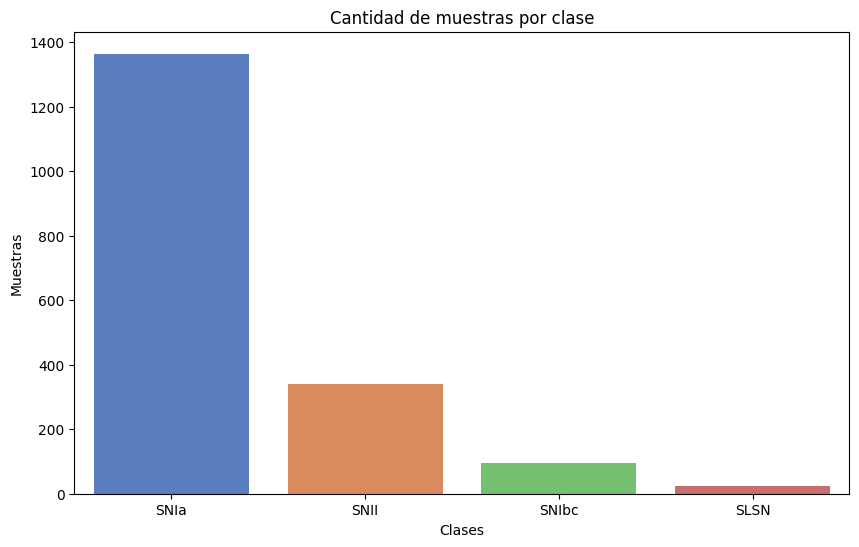

In [15]:
# Visualizar la cantidad de datos para cada clase
count_classes = df_classes.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=count_classes.index, y=count_classes.values, hue=df_classes.unique(), palette="muted", legend=False)
plt.title('Cantidad de muestras por clase')
plt.xlabel('Clases')
plt.ylabel('Muestras')
plt.show()

In [16]:
# Cantidad de datos para cada clase
print('Cantidad de muestras por clase')
print(df_classes.value_counts())
print('Número total muestras:', df_classes.value_counts().sum())

Cantidad de muestras por clase
classALeRCE_modified
SNIa     1364
SNII      339
SNIbc      96
SLSN       24
Name: count, dtype: int64
Número total muestras: 1823


In [17]:
# Features
print('Features:', np.array(df_train.columns))
print('Cantidad de features:', len(np.array(df_train.columns)))

Features: ['SPM_t0_g' 'SPM_beta_r' 'SPM_tau_rise_r' 'SPM_tau_rise_g' 'g-r_max_g_r'
 'SPM_t0_r' 'LinearTrend_r' 'AndersonDarling_r' 'SPM_beta_g'
 'SPM_tau_fall_r' 'dmag_first_det_fid_g' 'MHPS_low_g' 'LinearTrend_g'
 'g-r_mean_g_r' 'MHPS_ratio_g' 'SPM_tau_fall_g' 'SPM_gamma_r'
 'MHPS_ratio_r' 'Skew_r' 'sgscore1' 'SPM_gamma_g' 'Power_rate_2_g_r'
 'IAR_phi_r' 'dmag_first_det_fid_r' 'IAR_phi_g'
 'last_diffmaglim_before_fid_g' 'Period_band_g' 'Harmonics_mag_6_g'
 'MHPS_low_r' 'Gskew_r']
Cantidad de features: 30


# `BalancedRandomForestClassifier`

## Entrenamiento

In [38]:
# Separación de la data en features y clase
X = df_train
y = df_classes

# Separación de la data en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Entrenamiento del modelo
BRFC = BalancedRandomForestClassifier(n_estimators=500,
                                    max_features='sqrt',
                                    max_depth=None,
                                    n_jobs=-1,
                                    bootstrap=True,
                                    class_weight='balanced_subsample',
                                    criterion='entropy',
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    sampling_strategy='all',
                                    replacement=True)
BRFC.fit(X_train, y_train)

# Predicción del modelo
y_pred = BRFC.predict(X_test)

## Features más importantes

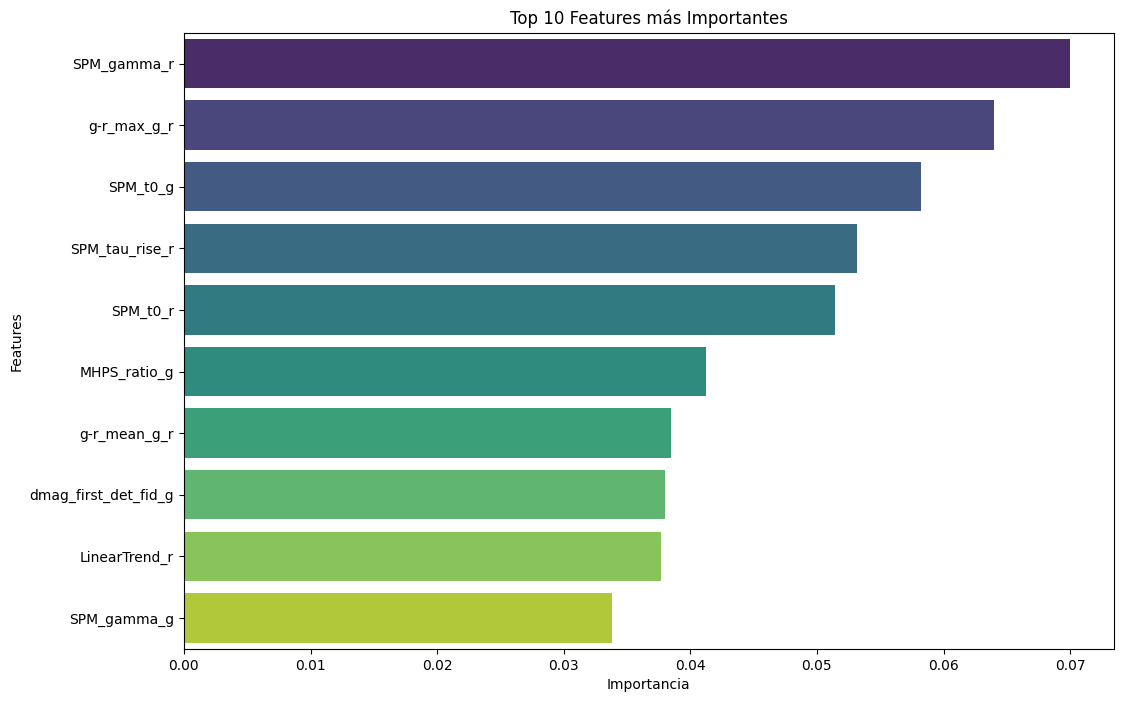

Features ordenados por importancia:
SPM_gamma_r & 0.070
g-r_max_g_r & 0.064
SPM_t0_g & 0.058
SPM_tau_rise_r & 0.053
SPM_t0_r & 0.051
MHPS_ratio_g & 0.041
g-r_mean_g_r & 0.039
dmag_first_det_fid_g & 0.038
LinearTrend_r & 0.038
SPM_gamma_g & 0.034
SPM_tau_rise_g & 0.034
IAR_phi_r & 0.033
SPM_tau_fall_r & 0.032
dmag_first_det_fid_r & 0.032
AndersonDarling_r & 0.029
SPM_tau_fall_g & 0.028
Skew_r & 0.028
LinearTrend_g & 0.027
sgscore1 & 0.027
SPM_beta_r & 0.027
SPM_beta_g & 0.025
Period_band_g & 0.022
Power_rate_2_g_r & 0.022
Gskew_r & 0.022
IAR_phi_g & 0.022
Harmonics_mag_6_g & 0.022
MHPS_low_g & 0.021
MHPS_ratio_r & 0.021
MHPS_low_r & 0.021
last_diffmaglim_before_fid_g & 0.018


In [33]:
# Features más importantes
feature_importances = BRFC.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices][:10], y=features[indices][:10], palette='viridis', hue=features[indices][:10], legend=False)
plt.title('Top 10 Features más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.show()

print('Features ordenados por importancia:')
for i in indices:
        print(list(X_train)[i], "& %.3f" % (BRFC.feature_importances_[i]))

## Métricas

In [ ]:
## Métricas obtenidas del modelo

accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Macro Precision: {macro_precision}')
print(f'Macro Recall: {macro_recall}')
print(f'Macro F1: {macro_f1}')


Accuracy: 0.6986301369863014
Balanced Accuracy: 0.6461393869288605
Macro Precision: 0.4893485546711353
Macro Recall: 0.6461393869288605
Macro F1: 0.5175450967424007


In [36]:
import pandas as pd

# Contar el número de ejemplos por clase en y_test
y_test_class_distribution = pd.Series(y_test).value_counts()

# Mostrar la distribución por clase
print(y_test_class_distribution)



classALeRCE_modified
SNIa     273
SNII      68
SNIbc     19
SLSN       5
Name: count, dtype: int64


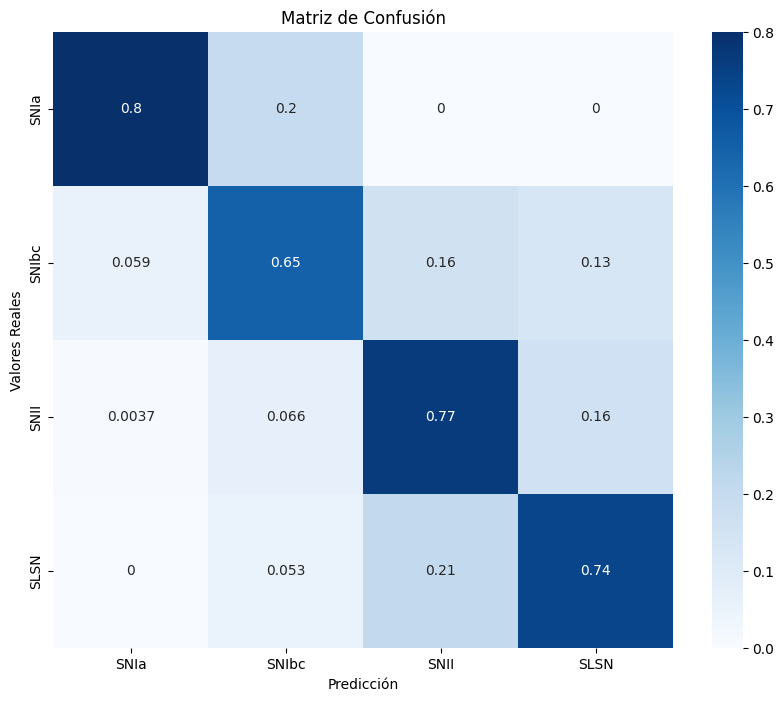

In [39]:


# Clases del modelo
class_names = ['SNIa', 'SNIbc', 'SNII', 'SLSN']  # Cambia el orden de las clases

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, normalize="true")
plt.figure(figsize=(10, 8))

# Heatmap con los nombres de las clases reordenados
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valores Reales')
plt.show()
